In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
figure_size = (3, 3.5)
paper_title = 'BandSeer'

In [118]:
# NYU-METS-M15-Standard
TPA_LSTM_rmse = [4.0038, 4.6102, 5.0779]
Bi_LSTM_64_rmse = [4.0569, 4.3087, 4.5318]
Bi_LSTM_64_std = [4.05, 4.297, 4.525]
Informer_rmse = [4.12426, 4.37762, 4.63162]
EWMA8_rmse = [4.450941296, 4.658181359, 4.852012059]
Shifted_rmse = [4.661624432, 4.874304771, 5.090734005]

index = [1, 2, 3]
df_rmse = pd.DataFrame(
    {'TPA_LSTM': TPA_LSTM_rmse, 
     'Bi_LSTM_64': Bi_LSTM_64_rmse, 
     'Informer': Informer_rmse, 
     'EWMA8': EWMA8_rmse, 
     'Shifted': Shifted_rmse,
     })
df_rmse = df_rmse.set_index([pd.Index(index)])
df_rmse

,TPA_LSTM,Bi_LSTM_64,Informer,EWMA8,Shifted
1,4.0038,4.0569,4.12426,4.450941,4.661624
2,4.6102,4.3087,4.37762,4.658181,4.874305
3,5.0779,4.5318,4.63162,4.852012,5.090734


In [119]:
""" plt.figure(figsize=figure_size, dpi=200)
#plt.rcParams.update({'font.size': 18})
#plt.xlim(left=0, right=3)
#plt.ylim(bottom=3, top=5.1)

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Mbps)')
plt.plot(index, df_rmse['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
plt.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_rmse['BandFormer_s'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
#plt.tight_layout() # plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
#plt.title('Evaluation on the NYU-METS LTE dataset (RMSE)')
plt.legend(loc='lower right')
#plt.savefig(f'plots/NYU-METS-comparison-RMSE.pdf', bbox_inches='tight') """

' plt.figure(figsize=figure_size, dpi=200)\n#plt.rcParams.update({\'font.size\': 18})\n#plt.xlim(left=0, right=3)\n#plt.ylim(bottom=3, top=5.1)\n\nplt.xlabel(\'Prediction Horizon (Seconds)\')\nplt.ylabel(\'Bandwidth Error (Mbps)\')\nplt.plot(index, df_rmse[\'TPA_LSTM\'], "-o", color="c", label="TPA-LSTM")\nplt.plot(index, df_rmse[\'Bi_LSTM_64\'], "-o", color="g", label="Bi-LSTM")\nplt.plot(index, df_rmse[\'BandFormer_s\'] , "-o", color="b", label="BandFormer")\nplt.plot(index, df_rmse[\'Shifted\'] , "-o", color="r", label="Shifted")\nplt.plot(index, df_rmse[\'EWMA8\'] , "-o", color="k", label="EWMA8")\n\n#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment=\'center\', fontsize=12)\n#plt.tight_layout() # plt.figure(layout=\'tight\') #\'constrained\', \'compressed\', \'tight\',\n#plt.title(\'Evaluation on the NYU-METS LTE dataset (RMSE)\')\nplt.legend(loc=\'lower right\')\n#plt.savefig(f\'plots/NYU-METS-comparison-RMSE.pdf\', bbox_inches=\'tight\') '

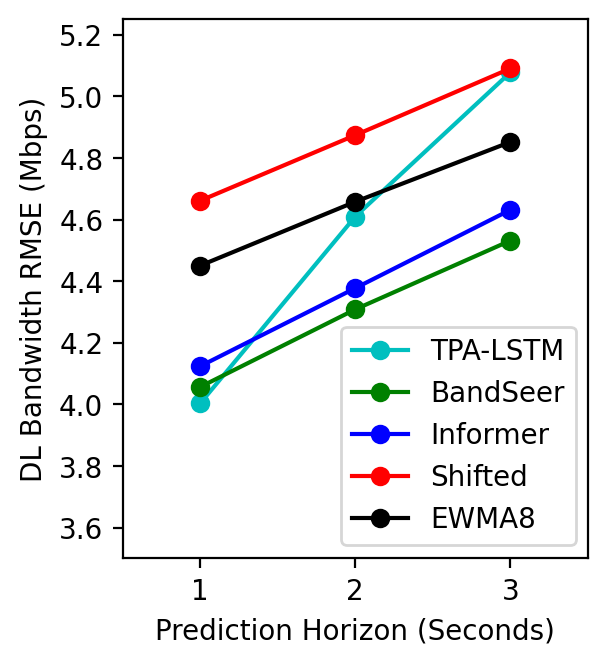

In [120]:
fig, ax1 = plt.subplots(figsize=figure_size, dpi=200)
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('DL Bandwidth RMSE (Mbps)')
ax1.set_xlim(left=0.5, right=3.5)
ax1.set_ylim(bottom=3.5, top=5.25)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
#left, bottom, width, height = [0.48, 0.18, 0.4, 0.27]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.set_xlim(left=0, right=6)
#ax2.set_ylim(bottom=5, top=22)


ax1.plot(index, df_rmse['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
ax1.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label=paper_title)
###########ax1.fill_between(range(len(index)),df_rmse['Bi_LSTM_64']-stds,means+stds,alpha=.1)
ax1.plot(index, df_rmse['Informer'] , "-o", color="b", label="Informer")
ax1.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
ax1.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")
ax1.legend(loc='lower left', bbox_to_anchor=(0.44, 0))
#ax1.legend(loc='upper left', fontsize=18, bbox_to_anchor=(0.50, 1.03), bbox_transform=fig.transFigure, frameon=False)

""" scope_s = 0
scope_e = 3
ax2.plot(index[scope_s:scope_e], df_rmse['TPA_LSTM'][scope_s:scope_e], "-o", color="c", label="TPA-LSTM")
ax2.plot(index[scope_s:scope_e], df_rmse['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_s'][scope_s:scope_e] , "-o", color="b", label="BandFormer_s")
#ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_m'][scope_s:scope_e] , "-o", color="m", label="BandFormer_m")
ax2.plot(index[scope_s:scope_e], df_rmse['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_rmse['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8") """

plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
fig.savefig(f'plots/NYU-METS-comparison-RMSE.pdf', bbox_inches='tight')
#fig.savefig(f'plots/NYU-METS-comparison-RMSE.png', bbox_inches='tight')

In [121]:
# NYU-METS-M15-Standard
TPA_LSTM_mae = [2.9043, 3.2362, 3.5488]
Bi_LSTM_64_mae = [2.936, 3.04939, 3.159]
Informer_mae = [3.01636, 3.20371, 3.39824]
EWMA8_mae = [3.151693978, 3.260105822, 3.372102351]
Shifted_mae = [3.34493947, 3.41438055, 3.532197952]

index = [1, 2, 3]
df_mae = pd.DataFrame(
    {'TPA_LSTM': TPA_LSTM_mae, 
     'Bi_LSTM_64': Bi_LSTM_64_mae, 
     'Informer': Informer_mae, 
     'EWMA8': EWMA8_mae, 
     'Shifted': Shifted_mae,
     })
df_mae = df_mae.set_index([pd.Index(index)])
df_mae

,TPA_LSTM,Bi_LSTM_64,Informer,EWMA8,Shifted
1,2.9043,2.93600,3.01636,3.151694,3.344939
2,3.2362,3.04939,3.20371,3.260106,3.414381
3,3.5488,3.15900,3.39824,3.372102,3.532198


In [122]:
""" plt.figure(figsize=figure_size, dpi=200)
#plt.xlim(left=0, right=3)
#plt.ylim(bottom=0, top=6)

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Mbps)')

plt.plot(index, df_mae['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
plt.plot(index, df_mae['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_mae['BandFormer_s'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_mae['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_mae['EWMA8'] , "-o", color="k", label="EWMA8")

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
#plt.tight_layout() # plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
#plt.title('Evaluation on the NYU-METS LTE dataset (MAE)')
plt.legend(loc='lower right')
#plt.savefig(f'plots/NYU-METS-comparison-MAE.pdf', bbox_inches='tight') """

' plt.figure(figsize=figure_size, dpi=200)\n#plt.xlim(left=0, right=3)\n#plt.ylim(bottom=0, top=6)\n\nplt.xlabel(\'Prediction Horizon (Seconds)\')\nplt.ylabel(\'Bandwidth Error (Mbps)\')\n\nplt.plot(index, df_mae[\'TPA_LSTM\'], "-o", color="c", label="TPA-LSTM")\nplt.plot(index, df_mae[\'Bi_LSTM_64\'], "-o", color="g", label="Bi-LSTM")\nplt.plot(index, df_mae[\'BandFormer_s\'] , "-o", color="b", label="BandFormer")\nplt.plot(index, df_mae[\'Shifted\'] , "-o", color="r", label="Shifted")\nplt.plot(index, df_mae[\'EWMA8\'] , "-o", color="k", label="EWMA8")\n\n#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment=\'center\', fontsize=12)\n#plt.tight_layout() # plt.figure(layout=\'tight\') #\'constrained\', \'compressed\', \'tight\',\n#plt.title(\'Evaluation on the NYU-METS LTE dataset (MAE)\')\nplt.legend(loc=\'lower right\')\n#plt.savefig(f\'plots/NYU-METS-comparison-MAE.pdf\', bbox_inches=\'tight\') '

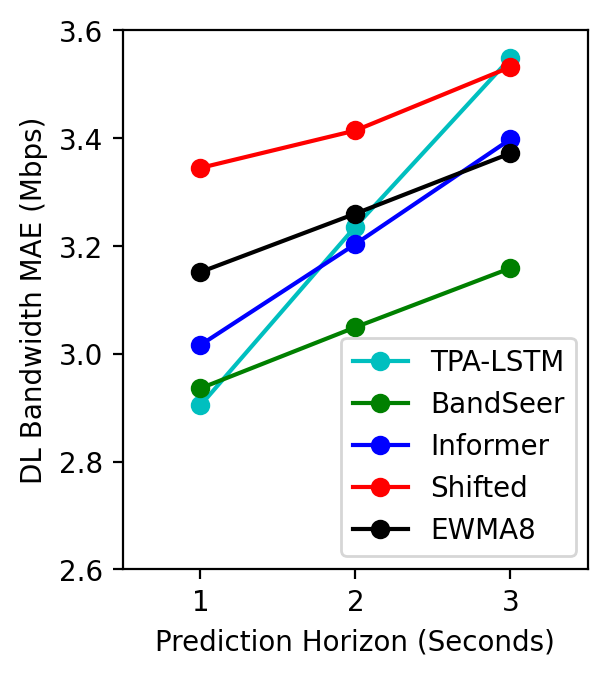

In [123]:
fig, ax1 = plt.subplots(figsize=figure_size, dpi=200)
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('DL Bandwidth MAE (Mbps)')
ax1.set_xlim(left=0.5, right=3.5)
ax1.set_ylim(bottom=2.6, top=3.6)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
#left, bottom, width, height = [0.5, 0.18, 0.38, 0.2]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.set_xlim(left=0, right=6)
#ax2.set_ylim(bottom=5, top=22)

ax1.plot(index, df_mae['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
ax1.plot(index, df_mae['Bi_LSTM_64'], "-o", color="g", label=paper_title)
ax1.plot(index, df_mae['Informer'] , "-o", color="b", label="Informer")
ax1.plot(index, df_mae['Shifted'] , "-o", color="r", label="Shifted")
ax1.plot(index, df_mae['EWMA8'] , "-o", color="k", label="EWMA8")
ax1.legend(loc='lower left', bbox_to_anchor=(0.44, 0))

""" scope_s = 0
scope_e = 3
ax2.plot(index[scope_s:scope_e], df_mae['TPA_LSTM'][scope_s:scope_e], "-o", color="c", label="TPA-LSTM")
ax2.plot(index[scope_s:scope_e], df_mae['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
ax2.plot(index[scope_s:scope_e], df_mae['BandFormer_s'][scope_s:scope_e] , "-o", color="b", label="BandFormer_s")
#ax2.plot(index[scope_s:scope_e], df_mae['BandFormer_m'][scope_s:scope_e] , "-o", color="m", label="BandFormer_m")
ax2.plot(index[scope_s:scope_e], df_mae['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_mae['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8") """

#plt.legend(loc='upper right')
plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
fig.savefig(f'plots/NYU-METS-comparison-MAE.pdf', bbox_inches='tight')
#fig.savefig(f'plots/NYU-METS-comparison-MAE.png', bbox_inches='tight')

In [124]:
# Beyond5G
Informer_rmse = [23410, 28944, 32923]#, 40996, 43436, 45269]
Bi_LSTM_64_rmse = [23373, 26209, 28829]#, 36749, 41375, 47127]
TPA_LSTM_rmse = [24.812, 33.658, 40.230]#, np.nan, np.nan, np.nan]
EWMA8_rmse = [38587, 41587, 43843]#, np.nan, np.nan, np.nan]
Shifted_rmse = [30017, 36923, 41869]#, np.nan, np.nan, np.nan]
						
df_rmse = pd.DataFrame(
    {'Informer': Informer_rmse, 
     'Bi_LSTM_64': Bi_LSTM_64_rmse, 
     'TPA_LSTM': TPA_LSTM_rmse, 
     'EWMA8': EWMA8_rmse, 
     'Shifted': Shifted_rmse,
     })

df_rmse['Informer'] = df_rmse['Informer'].div(1024)
df_rmse['Bi_LSTM_64'] = df_rmse['Bi_LSTM_64'].div(1024)
df_rmse['EWMA8'] = df_rmse['EWMA8'].div(1024)
df_rmse['Shifted'] = df_rmse['Shifted'].div(1024)

index = [1, 2, 3]#, 6, 12, 24]
df_rmse = df_rmse.set_index([pd.Index(index)])
df_rmse

,Informer,Bi_LSTM_64,TPA_LSTM,EWMA8,Shifted
1,22.861328,22.825195,24.812,37.682617,29.313477
2,28.265625,25.594727,33.658,40.612305,36.057617
3,32.151367,28.153320,40.230,42.815430,40.887695


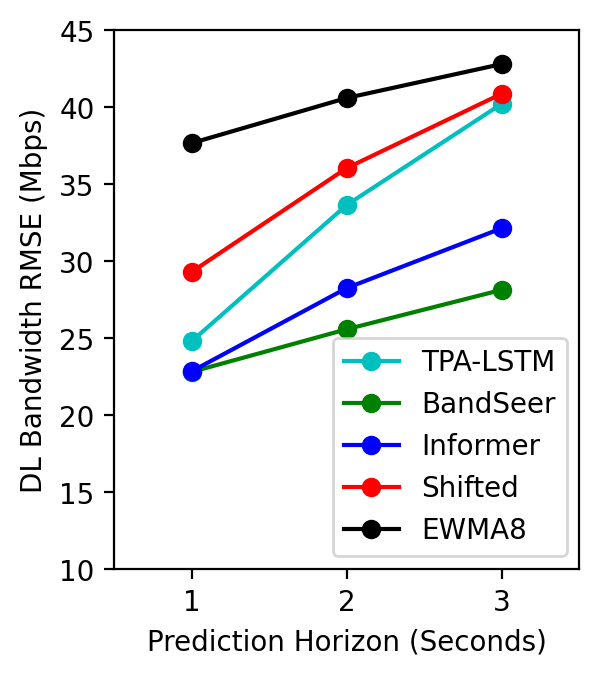

In [125]:
plt.figure(figsize=figure_size, dpi=200)
#plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
plt.xlim(left=0.5, right=3.5)
plt.ylim(bottom=10, top=45)

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('DL Bandwidth RMSE (Mbps)')
plt.plot(index, df_rmse['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
plt.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label=paper_title)
plt.plot(index, df_rmse['Informer'], "-o", color="b", label="Informer")
plt.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")
plt.legend(loc='lower left', bbox_to_anchor=(0.44, 0))
#plt.legend()#loc='lower right')

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(f'plots/5GBeyond-comparison-RMSE.pdf', bbox_inches='tight')
#plt.savefig(f'plots/5GBeyond-comparison-RMSE.png', bbox_inches='tight')

In [126]:
""" fig, ax1 = plt.subplots(figsize=figure_size, dpi=200)
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('Bandwidth RMSE (Mbps)')
ax1.set_xlim(left=0, right=5)
ax1.set_ylim(bottom=0, top=50)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
#left, bottom, width, height = [0.48, 0.2, 0.4, 0.3]
#ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(index, df_rmse['TPA_LSTM'], "-o", color="c", label="TPA-LSTM")
ax1.plot(index, df_rmse['Informer'], "-o", color="m", label="Informer")
ax1.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
ax1.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
ax1.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")
ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))
#ax1.legend(loc='upper left', fontsize=18, bbox_to_anchor=(0.50, 1.03), bbox_transform=fig.transFigure, frameon=False)
 """
""" scope_s = 0
scope_e = 4
ax2.plot(index[scope_s:scope_e], df_rmse['Informer_based'][scope_s:scope_e], "-o", color="m", label="Informer")
ax2.plot(index[scope_s:scope_e], df_rmse['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_s'][scope_s:scope_e] , "-o", color="b", label="BandFormer_s")
#ax2.plot(index[scope_s:scope_e], df_rmse['BandFormer_m'][scope_s:scope_e] , "-o", color="m", label="BandFormer_m")
ax2.plot(index[scope_s:scope_e], df_rmse['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_rmse['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8") """

#plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/5GBeyond-comparison-RMSE.pdf', bbox_inches='tight')

' scope_s = 0\nscope_e = 4\nax2.plot(index[scope_s:scope_e], df_rmse[\'Informer_based\'][scope_s:scope_e], "-o", color="m", label="Informer")\nax2.plot(index[scope_s:scope_e], df_rmse[\'Bi_LSTM_64\'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")\nax2.plot(index[scope_s:scope_e], df_rmse[\'BandFormer_s\'][scope_s:scope_e] , "-o", color="b", label="BandFormer_s")\n#ax2.plot(index[scope_s:scope_e], df_rmse[\'BandFormer_m\'][scope_s:scope_e] , "-o", color="m", label="BandFormer_m")\nax2.plot(index[scope_s:scope_e], df_rmse[\'Shifted\'][scope_s:scope_e] , "-o", color="r", label="Shifted")\nax2.plot(index[scope_s:scope_e], df_rmse[\'EWMA8\'][scope_s:scope_e] , "-o", color="k", label="EWMA8") '

In [127]:
Informer_mae = [10873, 13177, 15501]
Bi_LSTM_64_mae = [8671, 9859, 11090]

TPA_LSTM_mae = [9.0615, 13.5419, 17.0739]
EWMA8_mae = [17068, 18493, 19613]
Shifted_mae = [10809, 14046, 16489]
						
df_mae = pd.DataFrame(
    {'Informer': Informer_mae, 
     'Bi_LSTM_64': Bi_LSTM_64_mae, 
     'TPA_LSTM': TPA_LSTM_mae, 
     'EWMA8': EWMA8_mae,
     'Shifted': Shifted_mae,
     })

df_mae['Informer'] = df_mae['Informer'].div(1024)
df_mae['Bi_LSTM_64'] = df_mae['Bi_LSTM_64'].div(1024)
df_mae['EWMA8'] = df_mae['EWMA8'].div(1024)
df_mae['Shifted'] = df_mae['Shifted'].div(1024)

index = [1, 2, 3]
df_mae = df_mae.set_index([pd.Index(index)])
df_mae

,Informer,Bi_LSTM_64,TPA_LSTM,EWMA8,Shifted
1,10.618164,8.467773,9.0615,16.667969,10.555664
2,12.868164,9.627930,13.5419,18.059570,13.716797
3,15.137695,10.830078,17.0739,19.153320,16.102539


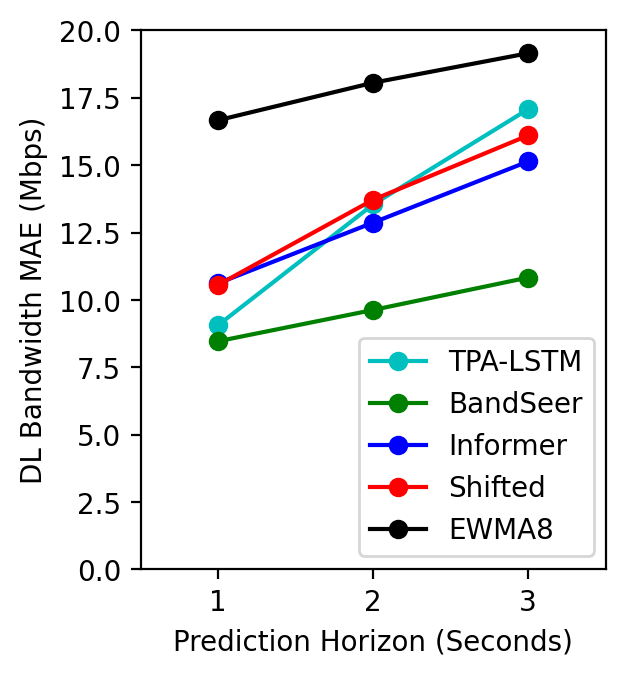

In [128]:
plt.figure(figsize=figure_size, dpi=200)
#plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
plt.xlim(left=0.5, right=3.5)
plt.ylim(bottom=0, top=20)

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('DL Bandwidth MAE (Mbps)')
plt.plot(index, df_mae['TPA_LSTM'] , "-o", color="c", label="TPA-LSTM")
plt.plot(index, df_mae['Bi_LSTM_64'], "-o", color="g", label=paper_title)
plt.plot(index, df_mae['Informer'], "-o", color="b", label="Informer")
plt.plot(index, df_mae['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_mae['EWMA8'] , "-o", color="k", label="EWMA8")
plt.legend(loc='lower left', bbox_to_anchor=(0.44, 0))

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(f'plots/5GBeyond-comparison-MAE.pdf', bbox_inches='tight')
#plt.savefig(f'plots/5GBeyond-comparison-MAE.png', bbox_inches='tight')

In [129]:
figure_size = (3*1.25, 2*1.25)

# BerlinV2X
Bi_LSTM_64_rmse_mse = [5533733, 7287612, 8347968, 10754641, 13847095, 17986850] # with MSE as loss function
Bi_LSTM_64_rmse = [5713529, 7199828.5, 8191601.5, 8905753, 9605881, 10123103, 10854995, 11280437, 11493049, 11946940, 12241142, 12575027] # with L1 as loss function
Informer_rmse = [6388104,	7592106.5,	8760565,	9809119,	11204281,	11447162,	11431452,	11836710,	13431102,	13620413,	14938569, 14510548] # 96 seq len
#BandFormer_m_rmse = [11874909, 17021450, 19268100, 25143996, 32274912, 39443512, 45506362]
EWMA8_rmse = [8887482,	9513294,	10056771,	10539029,	10972225,	11368995,	11737208,	12080773,	12403560,	12707784,	12996930,	13273173]
Shifted_rmse = [7556218,	8506882,	9284662,	9953684,	10523389,	11025004,	11482505,	11900707,	12289531,	12646350,	12980308,	13293401]

df_rmse = pd.DataFrame(
    {'Bi_LSTM_64': Bi_LSTM_64_rmse, 
     'Informer': Informer_rmse,
     'EWMA8': EWMA8_rmse, 
     'Shifted': Shifted_rmse,
     })

df_rmse['Bi_LSTM_64'] = df_rmse['Bi_LSTM_64'].div(1024*1024)
df_rmse['Informer'] = df_rmse['Informer'].div(1024*1024)
df_rmse['EWMA8'] = df_rmse['EWMA8'].div(1024*1024)
df_rmse['Shifted'] = df_rmse['Shifted'].div(1024*1024)
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12]
df_rmse = df_rmse.set_index([pd.Index(index)])
df_rmse

,Bi_LSTM_64,Informer,EWMA8,Shifted
1,5.448846,6.092171,8.475763,7.206171
2,6.866292,7.240397,9.072584,8.112795
3,7.812120,8.354726,9.590884,8.854544
4,8.493188,9.354705,10.050801,9.492573
5,9.160882,10.685235,10.463929,10.035886
6,9.654143,10.916864,10.842319,10.514263
7,10.352130,10.901882,11.193474,10.950570
8,10.757863,11.288366,11.521123,11.349399
9,10.960626,12.808897,11.828957,11.720210
10,11.393490,12.989438,12.119087,12.060499


In [130]:
""" plt.figure(figsize=(4,3), dpi=200)

plt.xlim(left=0, right=50)
plt.ylim(bottom=0, top=51)
plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Mbps)')
plt.plot(index, df_rmse['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_rmse['BandFormer'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_rmse['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_rmse['EWMA8'] , "-o", color="k", label="EWMA8")

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
#plt.tight_layout() # plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
#plt.title('Evaluation on the Berlin V2X dataset (RMSE)')
plt.legend()#loc='lower right')
plt.savefig(f'plots/BerlinV2X-comparison-RMSE.pdf', bbox_inches='tight') """

' plt.figure(figsize=(4,3), dpi=200)\n\nplt.xlim(left=0, right=50)\nplt.ylim(bottom=0, top=51)\nplt.xlabel(\'Prediction Horizon (Seconds)\')\nplt.ylabel(\'Bandwidth Error (Mbps)\')\nplt.plot(index, df_rmse[\'Bi_LSTM_64\'], "-o", color="g", label="Bi-LSTM")\nplt.plot(index, df_rmse[\'BandFormer\'] , "-o", color="b", label="BandFormer")\nplt.plot(index, df_rmse[\'Shifted\'] , "-o", color="r", label="Shifted")\nplt.plot(index, df_rmse[\'EWMA8\'] , "-o", color="k", label="EWMA8")\n\n#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment=\'center\', fontsize=12)\n#plt.tight_layout() # plt.figure(layout=\'tight\') #\'constrained\', \'compressed\', \'tight\',\n#plt.title(\'Evaluation on the Berlin V2X dataset (RMSE)\')\nplt.legend()#loc=\'lower right\')\nplt.savefig(f\'plots/BerlinV2X-comparison-RMSE.pdf\', bbox_inches=\'tight\') '

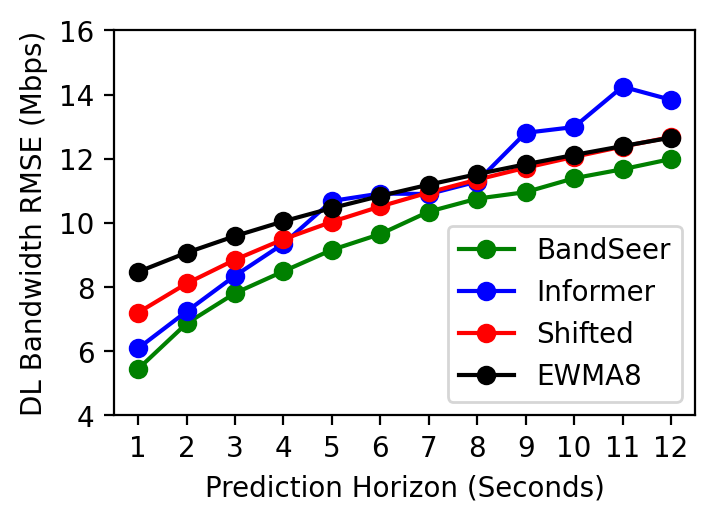

In [131]:
fig, ax1 = plt.subplots(figsize=figure_size, dpi=200)
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('DL Bandwidth RMSE (Mbps)')
ax1.set_xlim(left=0.5, right=12.5)
ax1.set_ylim(bottom=4, top=16)
ax1.set_xticks(index) 

# These are in unitless percentages of the figure size. (0,0 is bottom left)
""" left, bottom, width, height = [1.38, 1.21, 0.51, 0.37]
ax2 = fig.add_axes([left, bottom, width, height]) """
#ax2.set_xlim(left=0, right=6)
#ax2.set_ylim(bottom=5, top=22)

scope = 12
ax1.plot(index[:scope], df_rmse['Bi_LSTM_64'][:scope], "-o", color="g", label=paper_title)
ax1.plot(index[:scope], df_rmse['Informer'][:scope] , "-o", color="b", label="Informer")
ax1.plot(index[:scope], df_rmse['Shifted'][:scope] , "-o", color="r", label="Shifted")
ax1.plot(index[:scope], df_rmse['EWMA8'][:scope] , "-o", color="k", label="EWMA8")
ax1.legend(loc='lower left', bbox_to_anchor=(0.55, 0))
#ax1.legend(loc='upper left', fontsize=18, bbox_to_anchor=(0.50, 1.03), bbox_transform=fig.transFigure, frameon=False)

""" scope_s = 0
scope_e = 4
ax2.plot(index[scope_s:scope_e], df_rmse['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
ax2.plot(index[scope_s:scope_e], df_rmse['Informer'][scope_s:scope_e] , "-o", color="b", label="Informer")
ax2.plot(index[scope_s:scope_e], df_rmse['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_rmse['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8") """

plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')

fig.savefig(f'plots/BerlinV2X-comparison-RMSE.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-comparison-RMSE.png', bbox_inches='tight')

In [132]:
# BerlinV2X
Bi_LSTM_64_mae_mse = [3623475, 4937969, 5965795, 8155635, 10607764, 13806608]
Bi_LSTM_64_mae = [3453178,	4632774,	5412999,	5924549,	6366873,	6806212,	7283294,	7857669,	7890742,	8316347,	8482681,	8693628]
Informer_mae   = [4618926,	5283566,	6325945,	7050160,	8242302,	8137252,	8347855,	8392619,	9596401,	10182170,	11335654,	10524789]
EWMA8_mae      = [6056226,	6467724,	6824453,	7141635,	7429055,	7695282,	7945290,	8181877,	8406098,	8618387,	8821524,	9015817]
Shifted_mae    = [5022861,	5680130,	6213458,	6665709,	7055873,	7397143,    7708493,	7995120,	8267068,	8517453,	8755128,	8981791]

df_mae = pd.DataFrame(
    {'Bi_LSTM_64': Bi_LSTM_64_mae,
     'Informer': Informer_mae,
     'EWMA8': EWMA8_mae,
     'Shifted': Shifted_mae,
     })

df_mae['Bi_LSTM_64'] = df_mae['Bi_LSTM_64'].div(1024*1024)
df_mae['Informer'] = df_mae['Informer'].div(1024*1024)
df_mae['EWMA8'] = df_mae['EWMA8'].div(1024*1024)
df_mae['Shifted'] = df_mae['Shifted'].div(1024*1024)
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12]
df_mae = df_mae.set_index([pd.Index(index)])
df_mae

,Bi_LSTM_64,Informer,EWMA8,Shifted
1,3.293207,4.404951,5.775667,4.790174
2,4.418158,5.038801,6.168102,5.416994
3,5.162238,6.032891,6.508306,5.925615
4,5.650090,6.723557,6.810794,6.356915
5,6.071923,7.860472,7.084899,6.729005
6,6.490910,7.760288,7.338793,7.054465
7,6.945890,7.961135,7.577219,7.351392
8,7.493657,8.003825,7.802846,7.624741
9,7.525198,9.151841,8.016680,7.884090
10,7.931087,9.710474,8.219134,8.122876


In [133]:
""" plt.figure()#figsize=(9, 6))#, dpi=200)

plt.xlim(left=0, right=50)
plt.ylim(bottom=0, top=40)
plt.plot(index, df_mae['Bi_LSTM_64'], "-o", color="g", label="Bi-LSTM")
plt.plot(index, df_mae['BandFormer'] , "-o", color="b", label="BandFormer")
plt.plot(index, df_mae['Shifted'] , "-o", color="r", label="Shifted")
plt.plot(index, df_mae['EWMA8'] , "-o", color="k", label="EWMA8")

plt.xlabel('Prediction Horizon (Seconds)')
plt.ylabel('Bandwidth Error (Mbps)')

#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout() # plt.figure(layout='tight') #'constrained', 'compressed', 'tight',
#plt.title('Evaluation on the Berlin V2X dataset (MAE)')
plt.legend(loc='lower right', prop={'size': 12})
plt.savefig(f'plots/BerlinV2X-comparison-MAE.pdf', bbox_inches='tight') """

' plt.figure()#figsize=(9, 6))#, dpi=200)\n\nplt.xlim(left=0, right=50)\nplt.ylim(bottom=0, top=40)\nplt.plot(index, df_mae[\'Bi_LSTM_64\'], "-o", color="g", label="Bi-LSTM")\nplt.plot(index, df_mae[\'BandFormer\'] , "-o", color="b", label="BandFormer")\nplt.plot(index, df_mae[\'Shifted\'] , "-o", color="r", label="Shifted")\nplt.plot(index, df_mae[\'EWMA8\'] , "-o", color="k", label="EWMA8")\n\nplt.xlabel(\'Prediction Horizon (Seconds)\')\nplt.ylabel(\'Bandwidth Error (Mbps)\')\n\n#plt.figtext(0.5, 0.01, error_fig, wrap=True, horizontalalignment=\'center\', fontsize=12)\nplt.tight_layout() # plt.figure(layout=\'tight\') #\'constrained\', \'compressed\', \'tight\',\n#plt.title(\'Evaluation on the Berlin V2X dataset (MAE)\')\nplt.legend(loc=\'lower right\', prop={\'size\': 12})\nplt.savefig(f\'plots/BerlinV2X-comparison-MAE.pdf\', bbox_inches=\'tight\') '

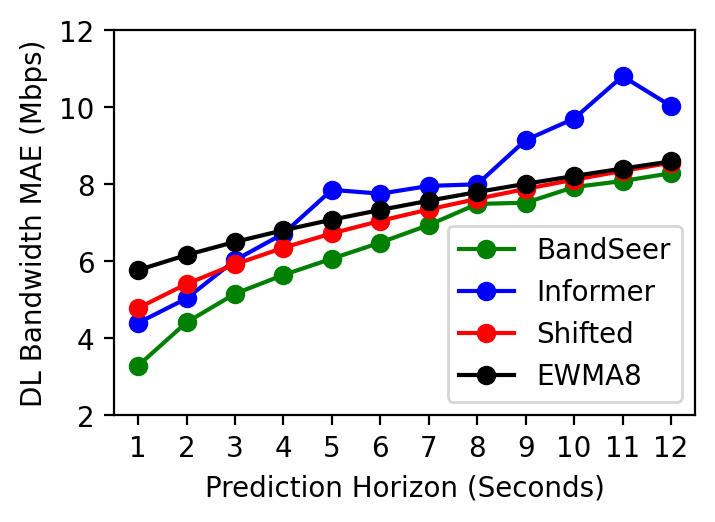

In [134]:
fig, ax1 = plt.subplots(figsize=figure_size, dpi=200)
#fig.legend(loc='outside upper right')
ax1.set_xlabel('Prediction Horizon (Seconds)')
ax1.set_ylabel('DL Bandwidth MAE (Mbps)')
ax1.set_xlim(left=0.5, right=12.5)
ax1.set_ylim(bottom=2, top=12)
ax1.set_xticks(index) 
#ax1.set_xticklabels(index, fontsize=12)
#plt.xlabel('Seconds')
#plt.ylabel('Bandwidth (Mbps)')

# These are in unitless percentages of the figure size. (0,0 is bottom left)
""" left, bottom, width, height = [1.38, 1.21, 0.51, 0.35]
ax2 = fig.add_axes([left, bottom, width, height]) """
#ax2.set_xlim(left=0, right=6)
#ax2.set_ylim(bottom=5, top=22)
# Plot
#ax1.plot(df[truth][:scope3] , color="red", label=truth)
#ax1.plot(df[prediction][:scope3], color="blue", label=prediction)

scope = 12
ax1.plot(index[:scope], df_mae['Bi_LSTM_64'][:scope], "-o", color="g", label=paper_title)
ax1.plot(index[:scope], df_mae['Informer'][:scope] , "-o", color="b", label="Informer")
ax1.plot(index[:scope], df_mae['Shifted'][:scope] , "-o", color="r", label="Shifted")
ax1.plot(index[:scope], df_mae['EWMA8'][:scope] , "-o", color="k", label="EWMA8")
ax1.legend(loc='lower left', bbox_to_anchor=(0.55, 0))

""" scope_s = 0
scope_e = 4
ax2.plot(index[scope_s:scope_e], df_mae['Bi_LSTM_64'][scope_s:scope_e], "-o", color="g", label="Bi-LSTM")
ax2.plot(index[scope_s:scope_e], df_mae['Informer'][scope_s:scope_e] , "-o", color="b", label="Informer")
ax2.plot(index[scope_s:scope_e], df_mae['Shifted'][scope_s:scope_e] , "-o", color="r", label="Shifted")
ax2.plot(index[scope_s:scope_e], df_mae['EWMA8'][scope_s:scope_e] , "-o", color="k", label="EWMA8") """

#plt.legend(loc='upper right')
plt.show()
#plt.savefig(f'plots/{DATA}-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-64-{scope4_s}-{scope4_e}.pdf', bbox_inches='tight')

fig.savefig(f'plots/BerlinV2X-comparison-MAE.pdf', bbox_inches='tight')
#fig.savefig(f'plots/BerlinV2X-comparison-MAE.png', bbox_inches='tight')